<a href="https://colab.research.google.com/github/sammyamajumdar/my_website/blob/main/PythonProject_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import the necessary libraries
import os
import numpy as np
from scipy.stats import kendalltau
import re
import matplotlib.pyplot as plt

In [5]:
# Q1 a

PATH = '/content/MorseCode.txt'

# A function that takes a file path and returns the all the contents of the MorseCode text file
def read_morse_file(path): 
    filepath = path
    with open(filepath, 'r') as f: 
        code = f.readlines()
        f.close()
    return code

'''
Grabs all the lines from the Morse file. iterates through them while deleting any white spaces
in the beginning or the end. Adds the corresponding morse code if its not already added 
the first letters are the keys (characters) and from index 2 onwards are the morse codes for said 
characters. The consistent formatting in the text file is reflected in the code in line 26. 
'''

def Morse(path): 
    morseDict = {}
    code = read_morse_file(path)
    for item in code: 
        item = item.strip()
        if item not in morseDict:
            morseDict[item[0]] = item[2:]
    
    return morseDict
Morse = Morse(PATH)
Morse

{'A': '.-',
 'B': '-...',
 'C': '-.-.',
 'D': '-..',
 'E': '.',
 'F': '..-.',
 'G': '--.',
 'H': '....',
 'I': '..',
 'J': '.---',
 'K': '-.-',
 'L': '.-..',
 'M': '--',
 'N': '-.',
 'O': '---',
 'P': '.--.',
 'Q': '--.-',
 'R': '.-.',
 'S': '...',
 'T': '-',
 'U': '..-',
 'V': '...-',
 'W': '.--',
 'X': '-..-',
 'Y': '-.--',
 'Z': '--..',
 '0': '-----',
 '1': '.----',
 '2': '..---',
 '3': '...--',
 '4': '....-',
 '5': '.....',
 '6': '-....',
 '7': '--...',
 '8': '---..',
 '9': '----.',
 '.': '.-.-.-',
 ',': '--..--',
 '?': '..--..',
 '-': '-....-',
 '/': '-..-.',
 ';': '-.-.-.',
 ':': '---...',
 '"': '.-..-.',
 "'": '.----.'}

In [36]:
# Q1 b


'''
Algorithm:
1. iterate through the list of characters in the text string
2. if text character not in Morse dictionary or a space indicating separation between words - add three spaces
3. if its a character is already in the Morse dict - concatenate the corresponding morse code with a single space in the end
4. return the output with 3 spaces added to mark the end of string
'''


def text2Morse(s): 
        
    morse_code = ''
    for item in list(s.upper()): 
        if item not in Morse or item == ' ': 
            morse_code += '   '
        else: 
            morse_code += Morse[item] + ' '

    return  morse_code + '   '

test_string = 'Take care, my friend'
output_string = text2Morse(test_string)
true_string = "- .- -.- .    -.-. .- .-. . --..--    -- -.--    ..-. .-. .. . -. -..    "
print(output_string == true_string)

True


In [34]:
# Q1 c

# set the path of the morsefiles
path = '/content/textfiles/'

# create a morsefiles folder
output = os.mkdir('morsefiles')
output_path = '/content/morsefiles'
for item in os.listdir(path): 
    with open(path+item, 'r') as f: 
        sentences = f.readlines()
        f.close()
    for sentence in sentences: 
        morse_code = text2Morse(sentence)
        # create custom output file names for input and write in them the morse outputs
        with open(os.path.join(output_path, item[:-4]+'_Morse.txt'), 'x') as f:
            f.write(morse_code)
    f.close()

In [33]:
# Q1 d 

'''
Algorithm:
1. strip preceding and trailing white spaces from the input string
2. list out the words in the sentence (using three white spaces as a separator)
3. create an empty string 
4. create an empty list for the final output sentence
5. create a modified version of Morse dictionary where the k,v pairs are interchanged for easier lookup
6. iterate through each word of the input string and split by character
7. iterate through the characters and concatenate the texts (found through the textMorseDict lookup) to word
8. Append each word to the sentence list and keep iterating until all words are added
9. join the words into a text string with one white space as a separator 
'''

def Morse2text(s):
    s = s.strip()  # eliminate trailing white spaces
    s = s.split('    ') # create a list of words in a sentence
    word = ''
    sentence = []
    textMorseDict = dict((v,k) for k,v in Morse.items()) # dictionary where morse : char
    for item in s: 
        item = item.split(' ') # split by characters
        for j in item: 
            word += textMorseDict[j] # add characters corresponding to morse 
        sentence.append(word) 
        word = ''
    return " ".join(sentence).lower() 
s = "- .- -.- .    -.-. .- .-. . --..--    -- -.--    ..-. .-. .. . -. -.. "
Morse2text(s)


'take care, my friend'

In [ ]:
# Q1 e

path = '/content/simple_story_Morse.txt'
with open(path, 'r') as f: 
    morse_code = f.readlines()
    f.close()

print(Morse2text(morse_code[0]))


there was once a sweet little maid who lived with her father and mother in a pretty little cottage at the edge of the village. at the further end of the wood was another pretty cottage and in it lived her grandmother. everybody loved this little girl, her grandmother perhaps loved her most of all and gave her a great many pretty things. once she gave her a red cloak with a hood which she always wore, so people called her little red riding hood.


In [31]:
# Q1 f

'''
Algorithm:
1. Grab all lines from the two files contained inside textfiles
2. add them in a texts list
3. grab the morse output from text2Morse, send it as an input to morse2text (convert it to lowercase since it is case-insensitive)
4. use python equality operator (==) to check if the functions work, returns boolean True if they are, False if original text and 
output text are not similar.
'''


testfilespath = '/content/textfiles/'
def testMorseFunc(testFilesPath):
     texts = []
     for item in os.listdir(testFilesPath):
         with open(testFilesPath+item, 'r') as f: 
             sentence  = f.readlines()
             f.close()
         texts.append(sentence)


     for idx in range(len(texts)):

        text_output = Morse2text(text2Morse(texts[idx][0]))
        print(f'File {idx+1} check:')
        print(text_output == texts[idx][0].lower().strip())
     
testMorseFunc(testfilespath)


File 1 check:
True
File 2 check:
True


In [6]:
# Q2 a

'''
Algorithm: 
1. Read the lines of the text in the file
2. iterate through the sentences with a for loop
3. split each sentence into words
4. iterate through the words while listing them by each char, and iterate further through each character with another nested for loop O(n^3)
5. convert all chars into lower case for consistency add to the char counter to be used later
6. if character not in the Morse dictionary - keep iterating
7. if item not in char_dict already AND is a key inside the Morse dictionary, set char as a key with value of 1
8. if item is already found in char add 1 to its value on every occurance
9. iterate through the char_dict dividing each value with total character count of the text
'''


def CharStats(fname):
    with open(fname, 'r') as f:
        sentences = f.readlines()
        f.close
    char_dict = {}
    char_count = 0
    for sentence in sentences: 
        sentence = sentence.split(' ')
        for char in sentence:
            char = list(char)
            for item in char:
                item = item.lower()
                char_count += 1
                if item.upper() not in Morse:
                    continue
                if (item not in char_dict) and (item.upper() in Morse):
                    char_dict[item] = 1
                else:
                    char_dict[item] += 1

    for chars in char_dict:
        char_dict[chars] /= char_count
    return char_dict

In [ ]:
# Q2 b
fname = '/content/EnglishWords.txt'
charFreq = CharStats(fname)
charFreq

In [21]:
# Q2 c

'''
Algorithm:
1. sort the dictionary by values since a ascending order of values are required for rank
2. grab the keys and values in a numpy array
3. create a new dictionary 
4. iterate through the keys of the initial input dictionary and add the ranks of all the values
5. the ranks are calculated by using np.isin and np.where - returns an array of indexes for every element,
for more than one occurance of a value, the rank is averages with np.mean,np.add is used to add to indexes
since python has zero based indexing and ranks start from 1. Made a true Python one liner from hell.
6. test dictionary D matches values given in problem sheet. 
'''



def rankStats(some_dict):

    # sorts the dictionary by value
    some_dict =  dict(sorted(some_dict.items(), key=lambda item: item[1]))
    vals = np.array(list(some_dict.values()))
    keys = np.array(list(some_dict.keys()))


    rankDict = {}
    
    for item in range(len(keys)):
            rankDict[keys[item]] = np.mean(np.add((np.where(np.isin(vals, vals[item]))), 1))
    
    return rankDict


D = {
    'w': 10,
    'x': 27,
    'y': 4.5,
    'z': 31,
    't': 1,
    'v': 10  
}
ranks = rankStats(D)
ranks

{'t': 1.0, 'y': 2.0, 'w': 3.5, 'v': 3.5, 'x': 5.0, 'z': 6.0}

In [16]:
# Q2 d

'''
Algorithm:
1. Convert the string character to its corresponding morse value
2. list out the individual dits and dahs
3. rejoin into a string with a space in between (to account for space between each dit and dah)
4. iterate through every item in the morse_code
5. add 1 to the length counter if space of dit is found
6. add 3 for every dah  
'''

def MorseLength(s, M): 
    morse_code = Morse[s.upper()]
    morse_code = list(morse_code)
    morse_code = ' '.join(morse_code)
    count = 0

    for item in morse_code:
        if item == ' ' or item == '.':
            count += 1
        if item == '-':
            count += 3

    return count
MorseLength('c', Morse)

11

In [15]:
# Q2 e

'''
Algorithm:
1. Create a CharLengths dictionary
2. Iterate through the Morse dictioanry and set the keys to CharLengths keys
and values to the out of the MorseLength outputs of said key
'''



def CharLength():
    CharLengths = {}
    for item in Morse: 
        CharLengths[item.lower()] = MorseLength(item, Morse)

    return CharLengths

CharLengths = CharLength()
CharLengths

{'a': 5,
 'b': 9,
 'c': 11,
 'd': 7,
 'e': 1,
 'f': 9,
 'g': 9,
 'h': 7,
 'i': 3,
 'j': 13,
 'k': 9,
 'l': 9,
 'm': 7,
 'n': 5,
 'o': 11,
 'p': 11,
 'q': 13,
 'r': 7,
 's': 5,
 't': 3,
 'u': 7,
 'v': 9,
 'w': 9,
 'x': 11,
 'y': 13,
 'z': 11,
 '0': 19,
 '1': 17,
 '2': 15,
 '3': 13,
 '4': 11,
 '5': 9,
 '6': 11,
 '7': 13,
 '8': 15,
 '9': 17,
 '.': 17,
 ',': 19,
 '?': 15,
 '-': 15,
 '/': 13,
 ';': 17,
 ':': 17,
 '"': 15,
 "'": 19}

In [13]:
# Q2 f

'''
Algorithm: 

1. get length of characters using charlength function and calculate its rank with rankStats
2. get frequency of characters from the englishwords.txt and calculate its rank with rankStats
3. get kendalltau rank rank_by_frequency against rank_by_length
4. drop characters not found in englishwords.txt from chars_by_length
5. input both dictionary values into kendalltau and investigate results

'''

ranks_by_freq = rankStats(charFreq)
ranks_by_length = rankStats(CharLengths)

###### this is to check which characters did not appear in the text ######
# for item in ranks_by_length:
#     if item not in ranks_by_freq:
#         print(item)

del ranks_by_length['/']
del ranks_by_length['?']
print(kendalltau(list(ranks_by_freq.values()), list(ranks_by_length.values())))

'''
Discussion of results:

The Kendalltau rank for both values is 0.947, which indicates a very high degree of correlation among the values.
Alfred Vail wanted the most frequently occuring characters to have the lesser number of 'dits' and 'dahs'. Mathematically,
this is a inverse relationship between frequency and length. Kendall Tau simply proved this. In the following cells,
it is observed that in the ranks_by_freq dictionary the character '\'' (single quote) has a rank 1 signifying that it occured the least 
in the text. When compared to the rank_by_length dictionary, the single quote character has a rank of 44, meaning that it has the largest
sequence of morse code elements. 

If we are to look a the character 'e' from ranks_by_freq, it occured the most in the text with a rank of 44, and has the least number
of characters, as shown by a rank of 1 in the ranks_by_length dictionary. A definite inverse relationship is proved by this exercise,
which was the main aim of Vail's work.

'''

KendalltauResult(correlation=0.9473374631730281, pvalue=1.3196172482038681e-17)


"\nDiscussion of results:\n\nThe Kendalltau rank for both values is 0.947, which indicates a very high degree of correlation among the values.\nAlfred Vail wanted the most frequently occuring characters to have the lesser number of 'dits' and 'dahs'. Mathematically,\nthis is a inverse relationship between frequency and length. Kendall Tau simply proved this. In the following cells,\nit is observed that in the ranks_by_freq dictionary the character ''' (single quote) has a rank 1 signifying that it occured the least \nin the text. When compared to the rank_by_length dictionary, the single quote character has a rank of 44, meaning that it has the largest\nsequence of morse code elements. \n\nIf we are to look a the character 'e' from ranks_by_freq, it occured the most in the text with a rank of 44, and has the least number\nof characters, as shown by a rank of 1 in the ranks_by_length dictionary. A definite inverse relationship is proved by this exercise,\nwhich was the main aim of Vail'

For observation: 

In [12]:
# Q2 f
ranks_by_freq

{"'": 1.0,
 '8': 3.0,
 '9': 3.0,
 '"': 3.0,
 '7': 5.0,
 '6': 6.5,
 '0': 6.5,
 '5': 8.0,
 '4': 9.0,
 '3': 10.0,
 ':': 11.0,
 '2': 12.0,
 '1': 13.5,
 'z': 13.5,
 'q': 15.5,
 'k': 15.5,
 '-': 17.0,
 'j': 18.0,
 ';': 19.0,
 'x': 20.0,
 '.': 21.0,
 'w': 22.0,
 'g': 23.0,
 'v': 24.0,
 'y': 25.0,
 ',': 26.0,
 'b': 27.0,
 'm': 28.0,
 'p': 29.0,
 'u': 30.0,
 'f': 31.0,
 'c': 32.0,
 'd': 33.0,
 'l': 34.0,
 'h': 35.0,
 'r': 36.0,
 'i': 37.0,
 'n': 38.0,
 'a': 39.0,
 's': 40.0,
 'o': 41.0,
 't': 42.0,
 'e': 43.0}

In [13]:
# Q2 f
ranks_by_length

{'e': 1.0,
 'i': 2.5,
 't': 2.5,
 'a': 5.0,
 'n': 5.0,
 's': 5.0,
 'd': 9.0,
 'h': 9.0,
 'm': 9.0,
 'r': 9.0,
 'u': 9.0,
 'b': 15.5,
 'f': 15.5,
 'g': 15.5,
 'k': 15.5,
 'l': 15.5,
 'v': 15.5,
 'w': 15.5,
 '5': 15.5,
 'c': 23.0,
 'o': 23.0,
 'p': 23.0,
 'x': 23.0,
 'z': 23.0,
 '4': 23.0,
 '6': 23.0,
 'j': 29.5,
 'q': 29.5,
 'y': 29.5,
 '3': 29.5,
 '7': 29.5,
 '2': 35.0,
 '8': 35.0,
 '-': 35.0,
 '"': 35.0,
 '1': 40.0,
 '9': 40.0,
 '.': 40.0,
 ';': 40.0,
 ':': 40.0,
 '0': 44.0,
 ',': 44.0,
 "'": 44.0}

In [14]:
# Q3 a 

'''
Algorithm:
1. check if string length is 1, and is present is a key in the Morse dict
2. If yes, return the string length from Morse Length
3. Otherwise, start two counters to keep track of string length and space count
4. strip trailing spaces, list out the string and iterate 
5. if a space is found, signifying space between two words - add 7 to string length and add 1 to space count
6. else add the out of the MorseLength function with 3 added to it (to account for 3 dits after every character)
7. since the 3 is adde to every character regardless of end of word or end of string, we deduct it from the 
final string length value -> 1 for the end of string, and for every space between words. 
'''


def MorseStringLength(s, M):
    if (len(s.strip()) == 1) and (s in Morse):
        return MorseLength(s, Morse)
    else:
        string_length = 0
        space_count = 0 
        for item in list(s.strip()):
            if item == ' ':
                string_length += 7
                space_count += 1
            else:
                string_length += MorseLength(item, Morse) + 3
                
        return string_length - (3*(space_count+1))

MorseStringLength('my tea ', Morse)



45

In [15]:
# Q3 b


'''
Algorithm: 

Duration of a dit in 1.2/word_speed, multiplied by the total length of the string in terms of dits gives the total 
time to transmit a string in morse.

'''

def MorseTime(s, S):
    
    return (1.2 / S) * MorseStringLength(s.strip().lower(), Morse)

MorseTime('Welcome to Ireland', 20)

9.18

In [16]:
# Q3 c

'''

Algorithm:
1. Find all words with only sequence of alphabets wit regex and return a list
2. Iterate through the list of words
3. Add time duration for sending each word by calling the MorseTime function

'''
def WordTime(s, S):
    pattern = r'\b[^\W\d_]+\b'
    text = re.findall(pattern,s)
    time_duration = []
    for item in text:
        time_duration.append(MorseTime(item,S))
    return time_duration

WordTime('Welcome to Ireland', 15)

[5.36, 1.36, 4.4]

In [48]:
# Q3 d

'''

Algorithm:
1. read the file and grab all sentences
2. filter for alphanumeric words in a list of all words with regex
3. iterate through the words and grab duration by calling WordTime function from previous question
4. grab durations for all the words and send to numpy.histogram method
5. return bin_edges and counts as a tuple

'''



def MorseFileStats(fname, S, N):
    with open(fname, 'r') as f:
        sentences = f.readlines()
        f.close()

    pattern = '[a-zA-Z]+[a-zA-Z]+|| [A-Za-z]+[0-9]+'
    words = re.findall(pattern, sentences[0])
    time_count = []
    for item in words: 
        if item == '':
            continue
        else: 
            time_count.append(WordTime(item, S))
    time_counts = []
    for item in time_count:
        time_counts.append(item[0])
    B, H = np.histogram(time_counts, bins = N)
    return (H, B) # H ~ bin edges, B ~ counts

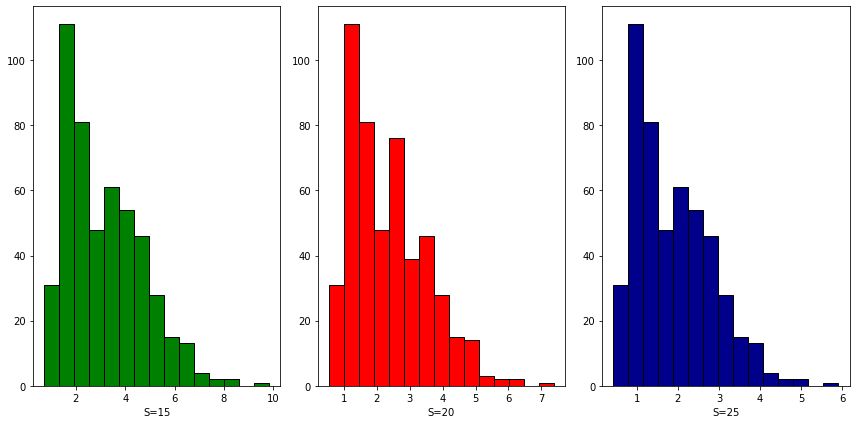

In [63]:
# Q3 e

'''

Algorithm:
1. grab the two files inside textfiles
2. create the file paths and add to file_names folder
3. create 1*3 subplots 
4. grab all the bin edges and counts from MorseFileStats function
5. Plot 

** Second file charts are in the next code cell. 

'''


testfilespath = '/content/textfiles/'
file_names = []
for item in os.listdir(testfilespath):
    file_names.append(os.path.join(testfilespath,item))


fig, ax = plt.subplots(1,3, tight_layout=True, figsize=(12,6))
bin_edges, counts = MorseFileStats(file_names[0], S=15,N=15)
bin_edges_1, counts_1 = MorseFileStats(file_names[0], S=20,N=15)
bin_edges_2, counts_2 = MorseFileStats(file_names[0], S=25,N=15)


bin_edges_3, counts_3 = MorseFileStats(file_names[1], S=15,N=15)
bin_edges_4, counts_4 = MorseFileStats(file_names[1], S=20,N=15)
bin_edges_5, counts_5 = MorseFileStats(file_names[1], S=25,N=15)

ax[0].bar(x=bin_edges[:-1], height=counts, width=np.diff(bin_edges), align='edge', fc='green', ec='black')
ax[0].set_xlabel('S=15')
ax[1].bar(x=bin_edges_1[:-1], height=counts_1, width=np.diff(bin_edges_1), align='edge', fc='red', ec='black')
ax[1].set_xlabel('S=20')
ax[2].bar(x=bin_edges_2[:-1], height=counts_2, width=np.diff(bin_edges_2), align='edge', fc='darkblue', ec='black')
ax[2].set_xlabel('S=25')

plt.show()


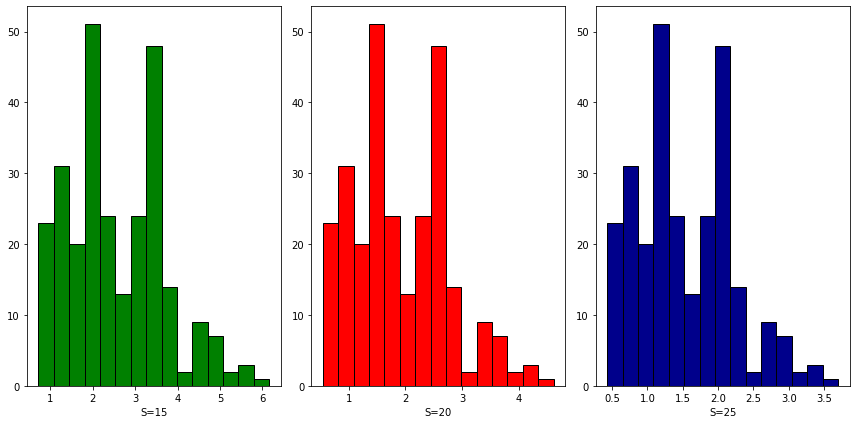

In [68]:
# Q3 e

'''
Algorithm: same as before
'''

fig, ax = plt.subplots(1,3, tight_layout=True, figsize=(12,6))

bin_edges, counts = MorseFileStats(file_names[1], S=15,N=15)
bin_edges_1, counts_1 = MorseFileStats(file_names[1], S=20,N=15)
bin_edges_2, counts_2 = MorseFileStats(file_names[1], S=25,N=15)

ax[0].bar(x=bin_edges[:-1], height=counts, width=np.diff(bin_edges), align='edge', fc='green', ec='black')
ax[0].set_xlabel('S=15')
ax[1].bar(x=bin_edges_1[:-1], height=counts_1, width=np.diff(bin_edges_1), align='edge', fc='red', ec='black')
ax[1].set_xlabel('S=20')
ax[2].bar(x=bin_edges_2[:-1], height=counts_2, width=np.diff(bin_edges_2), align='edge', fc='darkblue', ec='black')
ax[2].set_xlabel('S=25')

plt.show()